In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')
y=df.Outcome
X=df.drop('Outcome',axis=1)

In [3]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


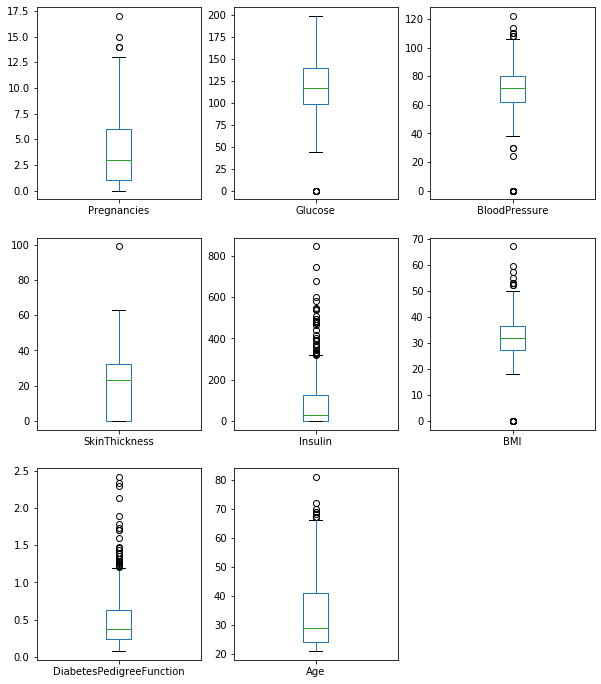

In [4]:
X.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,12))

plt.show()

In [5]:
X.replace({'Glucose': {0: np.nan},'BloodPressure': {0: np.nan},'SkinThickness': {0: np.nan},'Insulin': {0: np.nan},'BMI': {0: np.nan}},inplace=True)

In [6]:
X['Glucose'].fillna(X['Glucose'].mean(),inplace=True)
X['BloodPressure'].fillna(X['BloodPressure'].mean(), inplace=True)
X['BMI'].fillna(X['BMI'].mean(),inplace=True)
X['SkinThickness'].fillna(X['SkinThickness'].median(),inplace=True)
X['Insulin'].fillna(X['Insulin'].median(),inplace=True)

In [7]:
from scipy import stats
X_OR=X[(np.abs(stats.zscore(X))<3).all(axis=1)]

In [8]:
from sklearn.preprocessing import StandardScaler
normali=StandardScaler()
X_N=pd.DataFrame(normali.fit_transform(X_OR))
X_N.set_index(X_OR.index, inplace=True)
X_N.columns=X_OR.columns
y=y.loc[X_OR.index]

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy_score=[]
for i in range(1,50):
    KNN=KNeighborsClassifier(n_neighbors=i)
    cross=cross_val_score(KNN, X_N, y, cv=5 , scoring='accuracy')
    accuracy_score.append(cross.mean())

Text(0, 0.5, 'Accuracy Score')

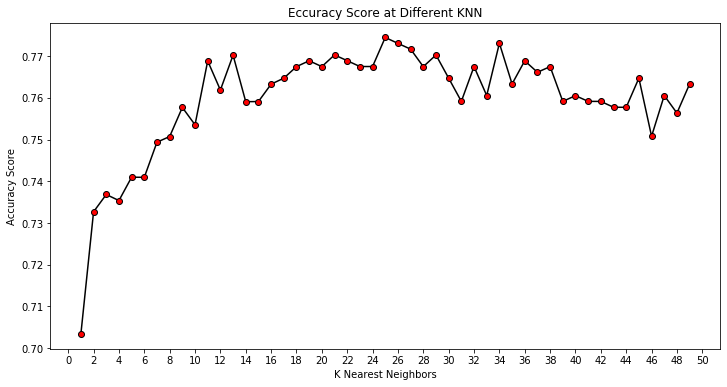

In [10]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50), accuracy_score, color='black',marker='o', markerfacecolor='red')
plt.xticks(np.arange(0, 52, step=2))
plt.title('Eccuracy Score at Different KNN')
plt.xlabel('K Nearest Neighbors')
plt.ylabel('Accuracy Score')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_N,y,random_state=42,test_size=0.30)

In [12]:
KNN=KNeighborsClassifier(n_neighbors=16)
KNN.fit(X_train,y_train)
y_pre=KNN.predict(X_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pre)